# LTRM Water Quality Variable Analysis

This script is meant to accompany the 'LTRM simplicial complex.ipynb' and performs the statistical analysis for the water quality variables. It will upload a pickle file with the X data and the simplicial complex that was created in 'LTRM simplical complex.ipynb'.

## Load libraries

In [1]:
import kmapper as km
from kmapper.plotlyviz import *
import pandas as pd
import numpy as np

import sklearn
#from sklearn import ensemble
# DBSCAN from sklearn for clustering algorithms
from sklearn.cluster import DBSCAN
# PCA from sklearn for projection/lens creation
from sklearn.decomposition import PCA
# from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# scipy for interpolation
# import scipy 
# from scipy.interpolate import *
import hdbscan
import pickle as pk
import json as js
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

# Plotly and Dash
import plotly.graph_objs as go
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
from ipywidgets import (HBox, VBox)
import dash_html_components as html
import dash_core_components as dcc
import dash
from ipywidgets import interactive, HBox, VBox, widgets, interact
import warnings
warnings.filterwarnings("ignore")

## Upload the data and scomplex from pickle file

In [2]:
# Use this if using a pickle file with the scomplex already created
scomplex = pk.load(open('LTRM.p', "rb"))
X = pk.load(open('LTRM_df.p', "rb"))

## Names for all of the columns

In [18]:
# SELECT THE TYPE OF ANALYSIS

# 1. All water quality variables
#continuous_variables = ["WDP","TEMP", "DO", "VEL", "TP", "TN", "SS", "CHLcal_unscaled","TURB","SECCHI"]

# 2. Removing TURB and SECCHI and only use SS
continuous_variables = ["WDP","TEMP", "DO", "VEL", "TP", "TN", "SS", "CHLcal"]

# 3. Remove water clarity variables (SS, TURB, and SECCHI) and analyze only nutrient variables
#continuous_variables = ["WDP","TEMP", "DO", "VEL", "TP", "TN", "CHLcal"]

min_samples = len(continuous_variables)

In [19]:
#continuous_variables = ["WDP","SECCHI","TEMP", "DO", "TURB", "VEL", "TP", "TN", "SS", "CHLcal"]

# Create the list of color columns for the list of continuouse variables being used
variable_colors = []
for variable in continuous_variables:
    temp = variable
    temp += '_color'
    variable_colors.append(temp)

pool_names = ['Unexploded Ordinance Area - Pool 13',
              'Bellevue, IA',
              'Brighton, IL',
              'Havana, IL',
              'Jackson, MO',
              'Lake City, MN',
              'Onalaska, WI']

decade_names = ['1993-2000', '1898-2004', '2001-2013', '2010-2016', '2014-2020']

stratum_names = ['Backwater area contiguous to the main channel',
                'Impounded',
                'Isolated',
                'Lake Pepin or Swan Lake',
                'Main channel',
                'Side channel']

state_names = ['State 1', 'State 2', 'State 3', 'State 4']

# Boxplots

In [4]:
# Make different dataframes for the observations in each state - use df if using pickle file
# May need to add more depending on how many states there are
state1 = X[X['State 1'] == 1] 
state2 = X[X['State 2'] == 1] 
state3 = X[X['State 3'] == 1] 
state4 = X[X['State 4'] == 1]
state5 = X[X['State 5'] == 1]
state6 = X[X['State 6'] == 1]

### Get the size of each state

In [5]:
states = [state1, state2, state3, state4, state5, state6]#, state6, state7, state8, state9,
          #state10], state11, state12, state13, state14, state15, state16, state17, state18] # adjust for the number of states

state_count = 1

for state in states:
    if state_count < 7:
        print("State " + str(state_count) + " has " + str(state.shape[0]) + " (" + str(state.shape[0]/X.shape[0] * 100) + "%)" + " samples.")
    if state_count == 7:
        print("Transition has " + str(state.shape[0]) + " (" + str(state.shape[0]/X.shape[0] * 100) + "%)" + " samples.")
    state_count = state_count + 1

State 1 has 300 (0.3912924389257718%) samples.
State 2 has 61950 (80.80188863817187%) samples.
State 3 has 18 (0.02347754633554631%) samples.
State 4 has 82 (0.10695326663971096%) samples.
State 5 has 18576 (24.22882781828379%) samples.
State 6 has 41269 (53.82749220675892%) samples.
Transition has 1213 (1.5821257613898707%) samples.


## Boxplots for PCA Ratio

### Boxplots for all water quality variables

In [ ]:
# Scaled boxplots
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, ((ax1, ax2, ax3, ax4, ax5), 
      (ax7, ax6, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 5, figsize = (50, 20))

bp1 = ax1.boxplot([state1['TURB'], state2['TURB'],state3['TURB'], state4['TURB'], state5['TURB']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax1.set_title('Turbidity')   
ax1.set_ylim(-1, 14)               

bp2 = ax2.boxplot([state1['SS'], state2['SS'],state3['SS'], state4['SS'],  state5['SS']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax2.set_title('Suspended Solids')   
ax2.set_ylim(-1, 14) 

bp3 = ax3.boxplot([state1['CHLcal'], state2['CHLcal'],state3['CHLcal'], state4['CHLcal'],  state5['CHLcal']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax3.set_title('Chlorophyll')   
ax3.set_ylim(-1, 14) 

bp4 = ax4.boxplot([state1['DO'], state2['DO'],state3['DO'], state4['DO'],  state5['DO']],
                    vert = True,
                    labels = ['1', '2','3','4','5'])
ax4.set_title('Dissolved Oxygen')   
ax4.set_ylim(-2, 14) 

bp5 = ax5.boxplot([state1['TN'], state2['TN'],state3['TN'], state4['TN'], state5['TN']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax5.set_title('Total Nitrogen')   
ax5.set_ylim(-1, 14)               

bp6 = ax6.boxplot([state1['TP'], state2['TP'],state3['TP'], state4['TP'], state5['TP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax6.set_title('Total Phosphorus')   
ax6.set_ylim(-1, 14) 

bp7 = ax7.boxplot([state1['SECCHI'], state2['SECCHI'],state3['SECCHI'], state4['SECCHI'], state5['SECCHI']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax7.set_title('Secchi')   
ax7.set_ylim(-1, 14) 

bp8 = ax8.boxplot([state1['WDP'], state2['WDP'],state3['WDP'], state4['WDP'], state5['WDP']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax8.set_title('Water Depth')   
ax8.set_ylim(-2, 14) 

bp9 = ax9.boxplot([state1['TEMP'], state2['TEMP'],state3['TEMP'], state4['TEMP'], state5['TEMP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax9.set_title('Temperature')   
ax9.set_ylim(-1, 14) 

bp10 = ax10.boxplot([state1['VEL'], state2['VEL'],state3['VEL'], state4['VEL'], state5['VEL']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax10.set_title('Velocity')   
ax10.set_ylim(-2, 14) 

plt.savefig('LTRM_boxplots_175_scaled.png')

### Boxplots for scomplex with no TURB or SECCHI

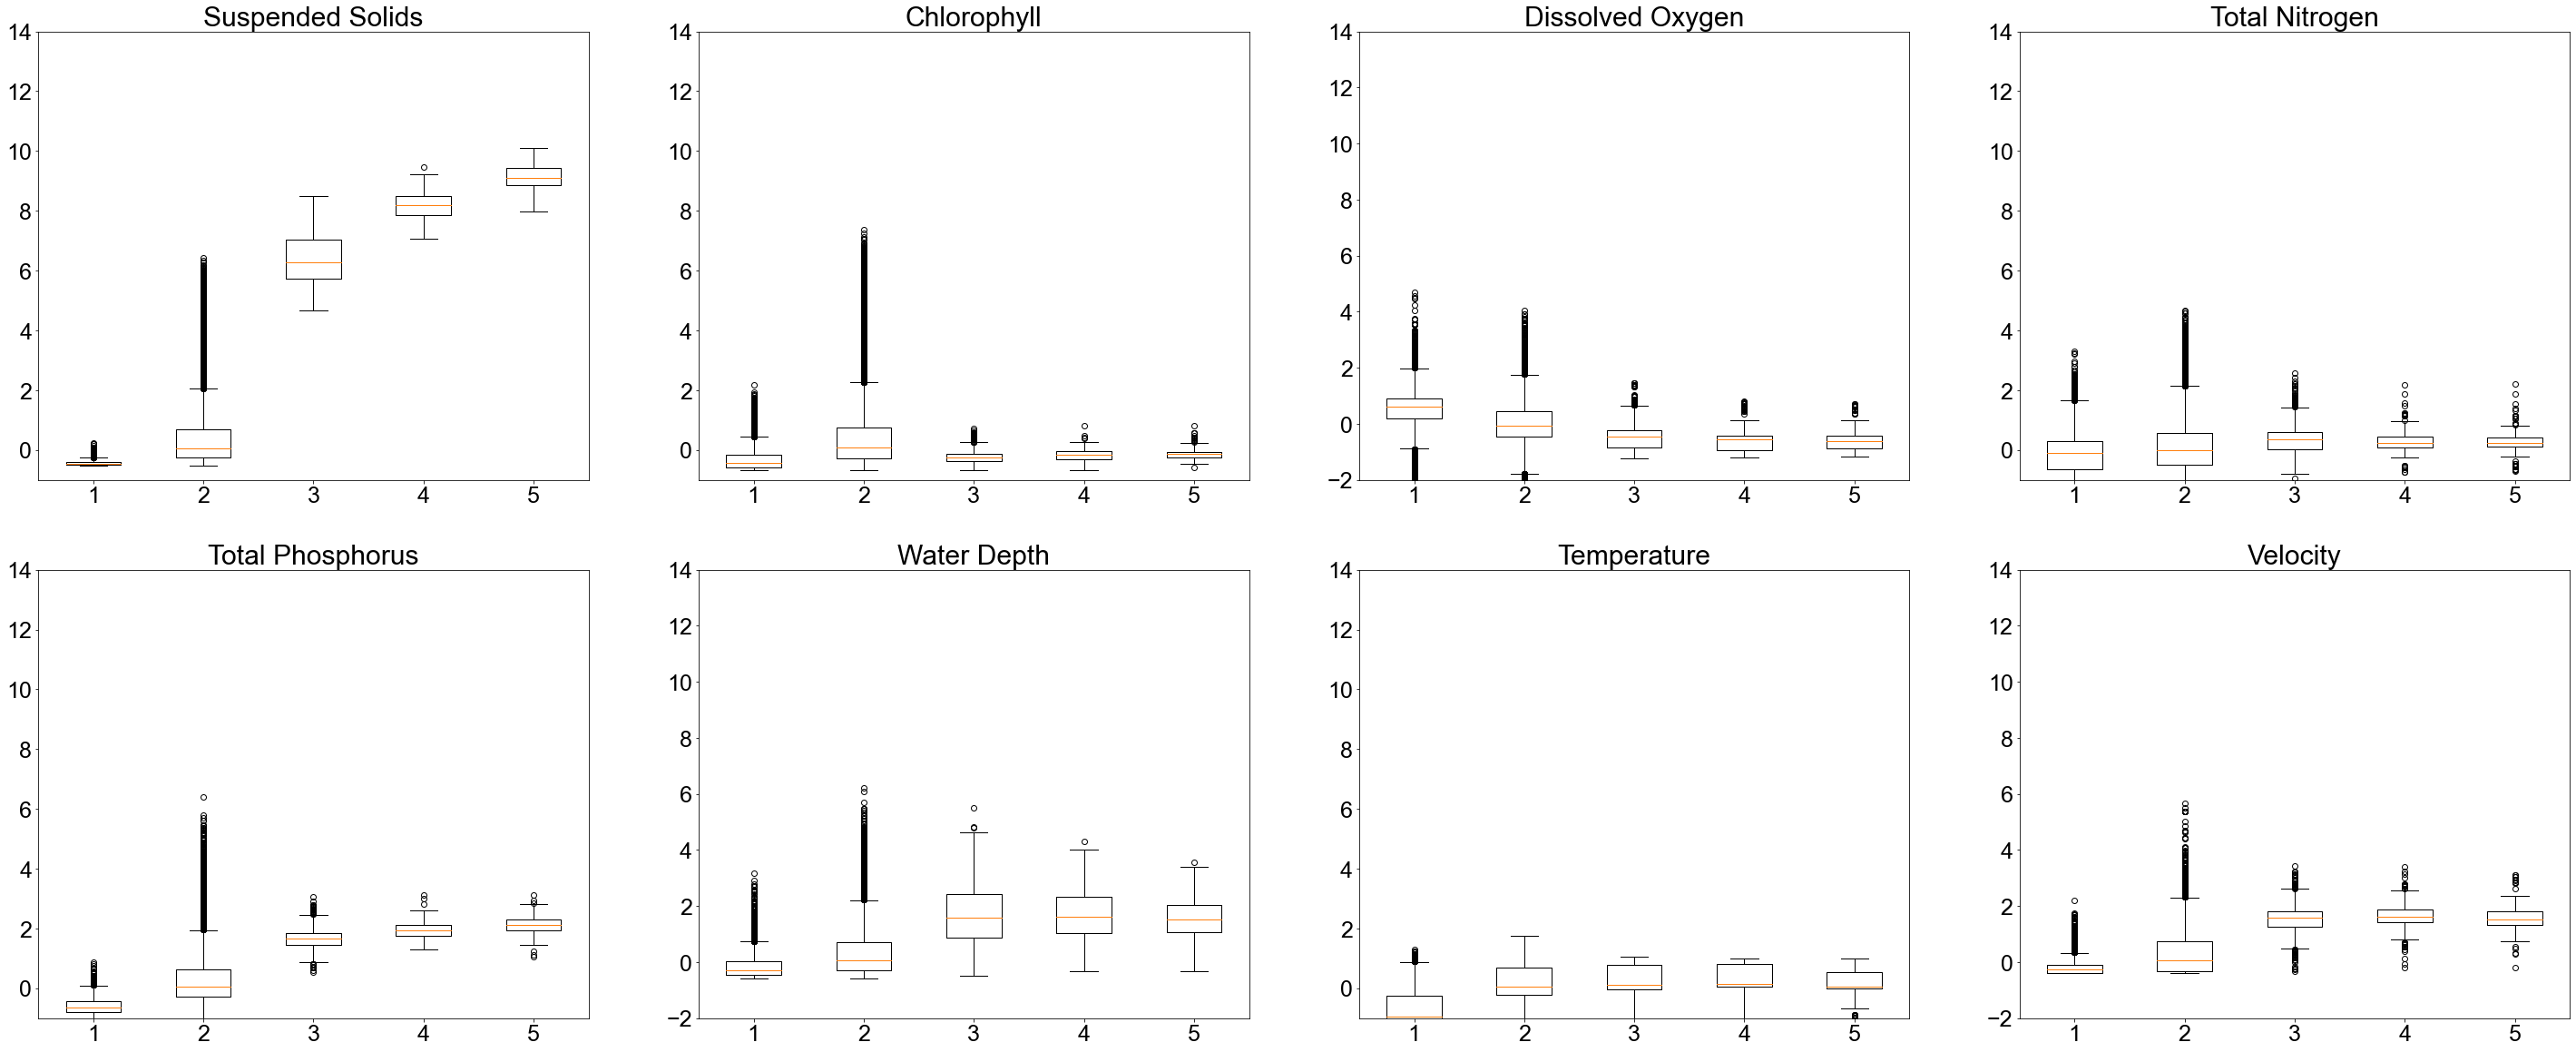

In [13]:
# Scaled boxplots
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, ((ax2, ax3, ax4, ax5), 
      (ax6, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 4, figsize = (50, 20))

# bp1 = ax1.boxplot([state1['TURB'], state2['TURB'],state3['TURB'], state4['TURB'], state5['TURB']],
#                     vert = True,
#                     labels = ['1', '2','3', '4', '5'])
# ax1.set_title('Turbidity')   
# ax1.set_ylim(-1, 14)               

bp2 = ax2.boxplot([state1['SS'], state2['SS'],state3['SS'], state4['SS'],  state5['SS']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax2.set_title('Suspended Solids')   
ax2.set_ylim(-1, 14) 

bp3 = ax3.boxplot([state1['CHLcal'], state2['CHLcal'],state3['CHLcal'], state4['CHLcal'],  state5['CHLcal']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax3.set_title('Chlorophyll')   
ax3.set_ylim(-1, 14) 

bp4 = ax4.boxplot([state1['DO'], state2['DO'],state3['DO'], state4['DO'],  state5['DO']],
                    vert = True,
                    labels = ['1', '2','3','4','5'])
ax4.set_title('Dissolved Oxygen')   
ax4.set_ylim(-2, 14) 

bp5 = ax5.boxplot([state1['TN'], state2['TN'],state3['TN'], state4['TN'], state5['TN']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax5.set_title('Total Nitrogen')   
ax5.set_ylim(-1, 14)               

bp6 = ax6.boxplot([state1['TP'], state2['TP'],state3['TP'], state4['TP'], state5['TP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax6.set_title('Total Phosphorus')   
ax6.set_ylim(-1, 14) 

# bp7 = ax7.boxplot([state1['SECCHI'], state2['SECCHI'],state3['SECCHI'], state4['SECCHI'], state5['SECCHI']],
#                     vert = True,
#                     labels = ['1', '2','3', '4', '5'])
# ax7.set_title('Secchi')   
# ax7.set_ylim(-1, 14) 

bp8 = ax8.boxplot([state1['WDP'], state2['WDP'],state3['WDP'], state4['WDP'], state5['WDP']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax8.set_title('Water Depth')   
ax8.set_ylim(-2, 14) 

bp9 = ax9.boxplot([state1['TEMP'], state2['TEMP'],state3['TEMP'], state4['TEMP'], state5['TEMP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax9.set_title('Temperature')   
ax9.set_ylim(-1, 14) 

bp10 = ax10.boxplot([state1['VEL'], state2['VEL'],state3['VEL'], state4['VEL'], state5['VEL']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax10.set_title('Velocity')   
ax10.set_ylim(-2, 14) 

plt.savefig('LTRM_boxplots_175_scaled.png')

### Boxplots for water nutrients only

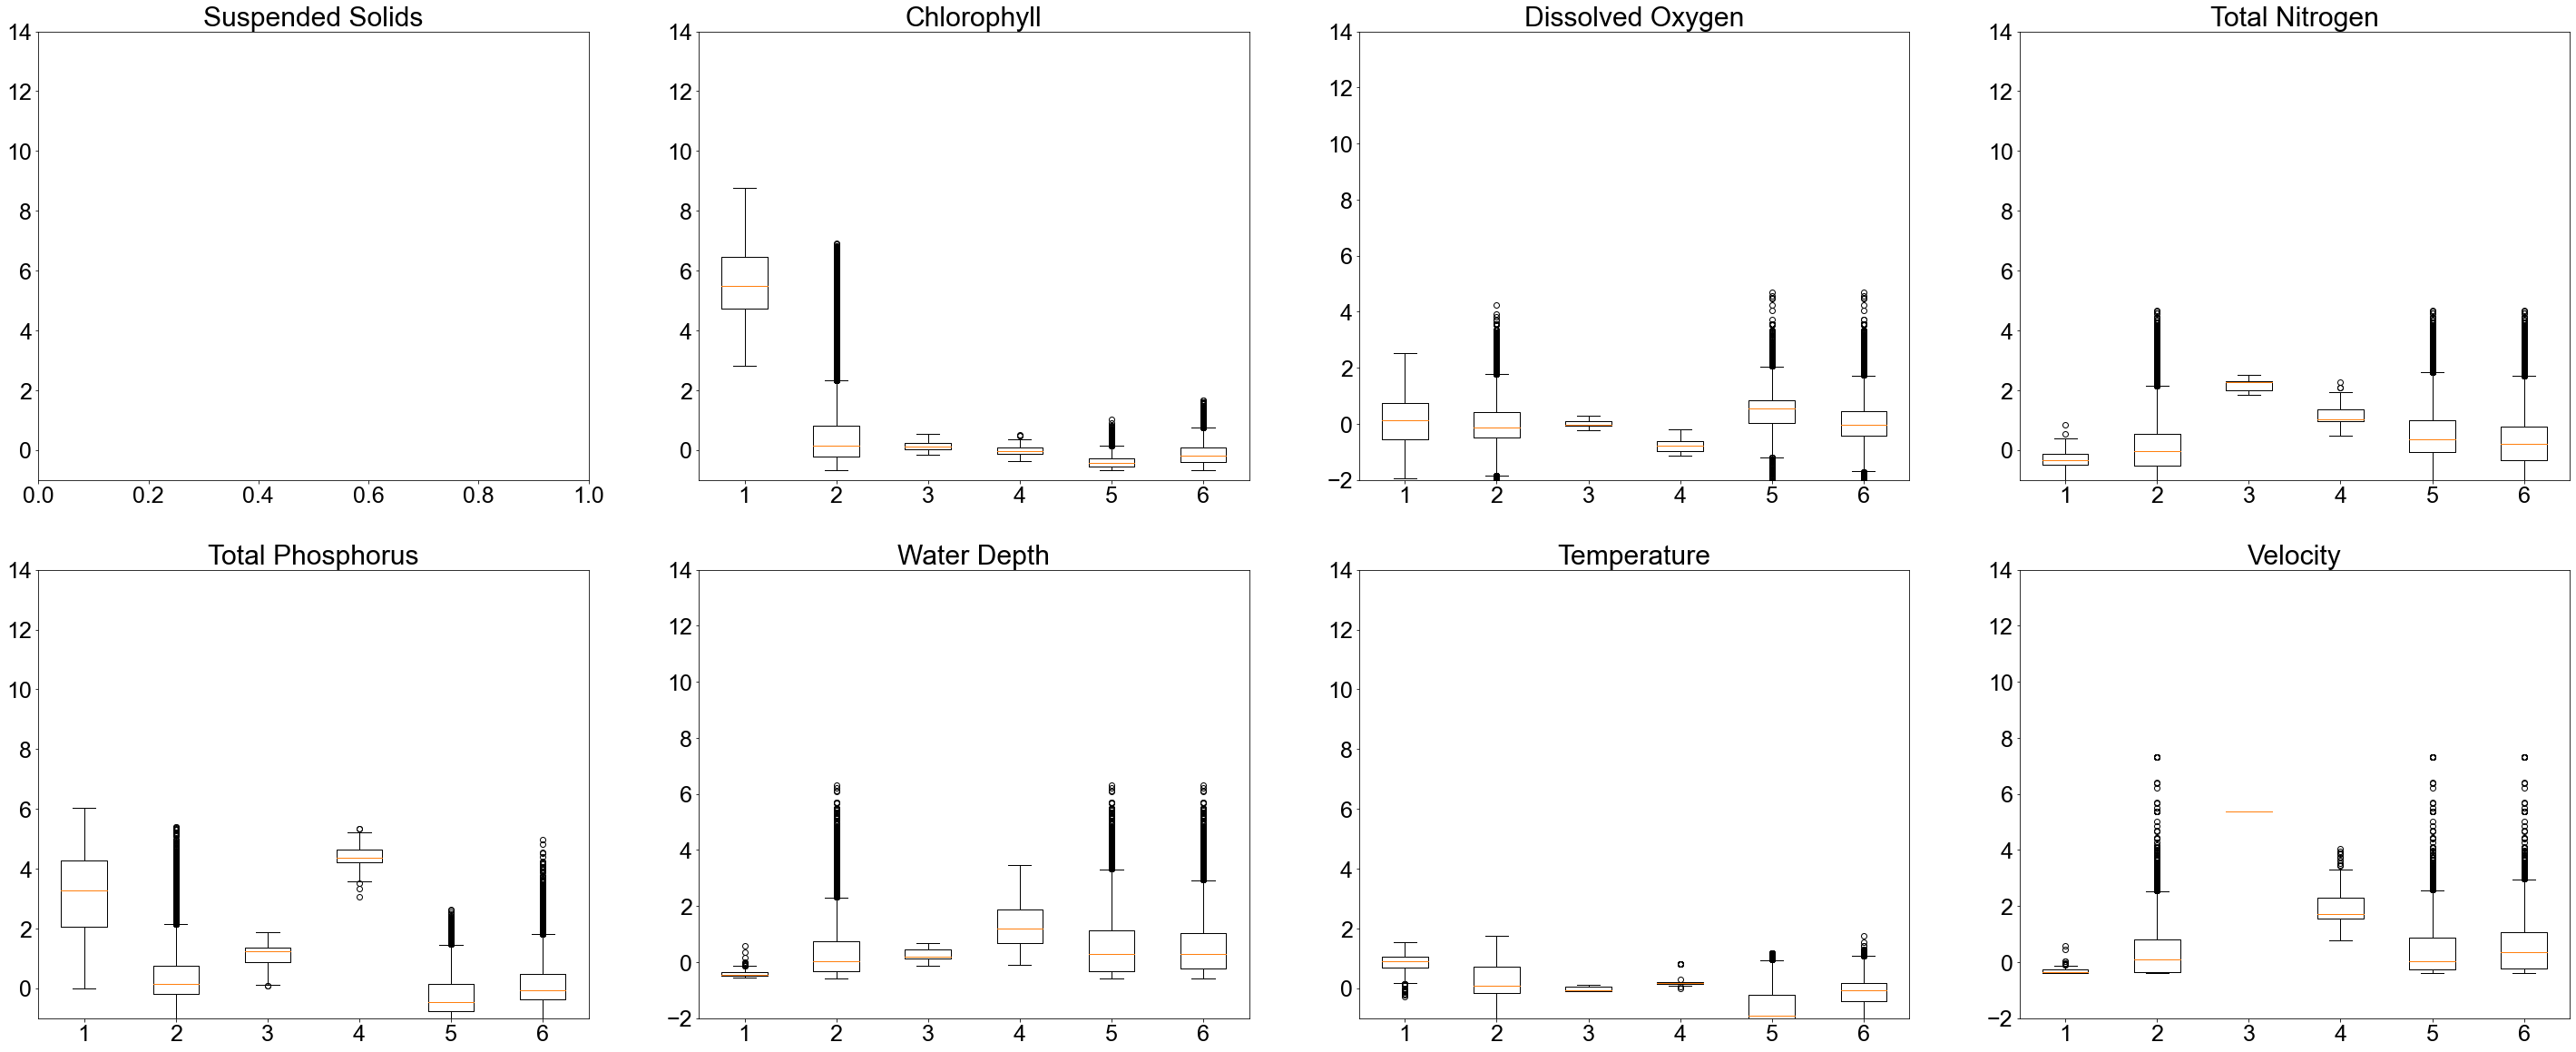

In [28]:
#Scaled boxplots
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, ((ax2, ax3, ax4, ax5), 
      (ax6, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 4, figsize = (50, 20))

# bp1 = ax1.boxplot([state1['TURB'], state2['TURB'],state3['TURB'], state4['TURB'], state5['TURB']],
#                     vert = True,
#                     labels = ['1', '2','3', '4', '5'])
# ax1.set_title('Turbidity')   
# ax1.set_ylim(-1, 14)               

#bp2 = ax2.boxplot([state1['SS'], state2['SS'],state3['SS'], state4['SS'],  state5['SS']],
#                    xvert = True,
#                    labels = ['1', '2','3', '4', '5'])
ax2.set_title('Suspended Solids')   
ax2.set_ylim(-1, 14) 

bp3 = ax3.boxplot([state1['CHLcal'], state2['CHLcal'],state3['CHLcal'], state4['CHLcal'],  state5['CHLcal'], state6['CHLcal']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5', '6'])
ax3.set_title('Chlorophyll')   
ax3.set_ylim(-1, 14) 

bp4 = ax4.boxplot([state1['DO'], state2['DO'],state3['DO'], state4['DO'],  state5['DO'], state6['DO']],
                    vert = True,
                    labels = ['1', '2','3','4','5','6'])
ax4.set_title('Dissolved Oxygen')   
ax4.set_ylim(-2, 14) 

bp5 = ax5.boxplot([state1['TN'], state2['TN'],state3['TN'], state4['TN'], state5['TN'], state6['TN']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5','6'])
ax5.set_title('Total Nitrogen')   
ax5.set_ylim(-1, 14)               

bp6 = ax6.boxplot([state1['TP'], state2['TP'],state3['TP'], state4['TP'], state5['TP'], state6['TP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5', '6'])
ax6.set_title('Total Phosphorus')   
ax6.set_ylim(-1, 14) 

# bp7 = ax7.boxplot([state1['SECCHI'], state2['SECCHI'],state3['SECCHI'], state4['SECCHI'], state5['SECCHI']],
#                     vert = True,
#                     labels = ['1', '2','3', '4', '5'])
# ax7.set_title('Secchi')   
# ax7.set_ylim(-1, 14) 

bp8 = ax8.boxplot([state1['WDP'], state2['WDP'],state3['WDP'], state4['WDP'], state5['WDP'], state6['WDP']],
                    vert = True,
                    labels = ['1', '2','3','4', '5', '6'])
ax8.set_title('Water Depth')   
ax8.set_ylim(-2, 14) 

bp9 = ax9.boxplot([state1['TEMP'], state2['TEMP'],state3['TEMP'], state4['TEMP'], state5['TEMP'],state6['TEMP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5', '6'])
ax9.set_title('Temperature')   
ax9.set_ylim(-1, 14) 

bp10 = ax10.boxplot([state1['VEL'], state2['VEL'],state3['VEL'], state4['VEL'], state5['VEL'], state6['VEL']],
                    vert = True,
                    labels = ['1', '2','3','4', '5', '6'])
ax10.set_title('Velocity')   
ax10.set_ylim(-2, 14) 

plt.savefig('LTRM_boxplots_nurtients_scaled.png')

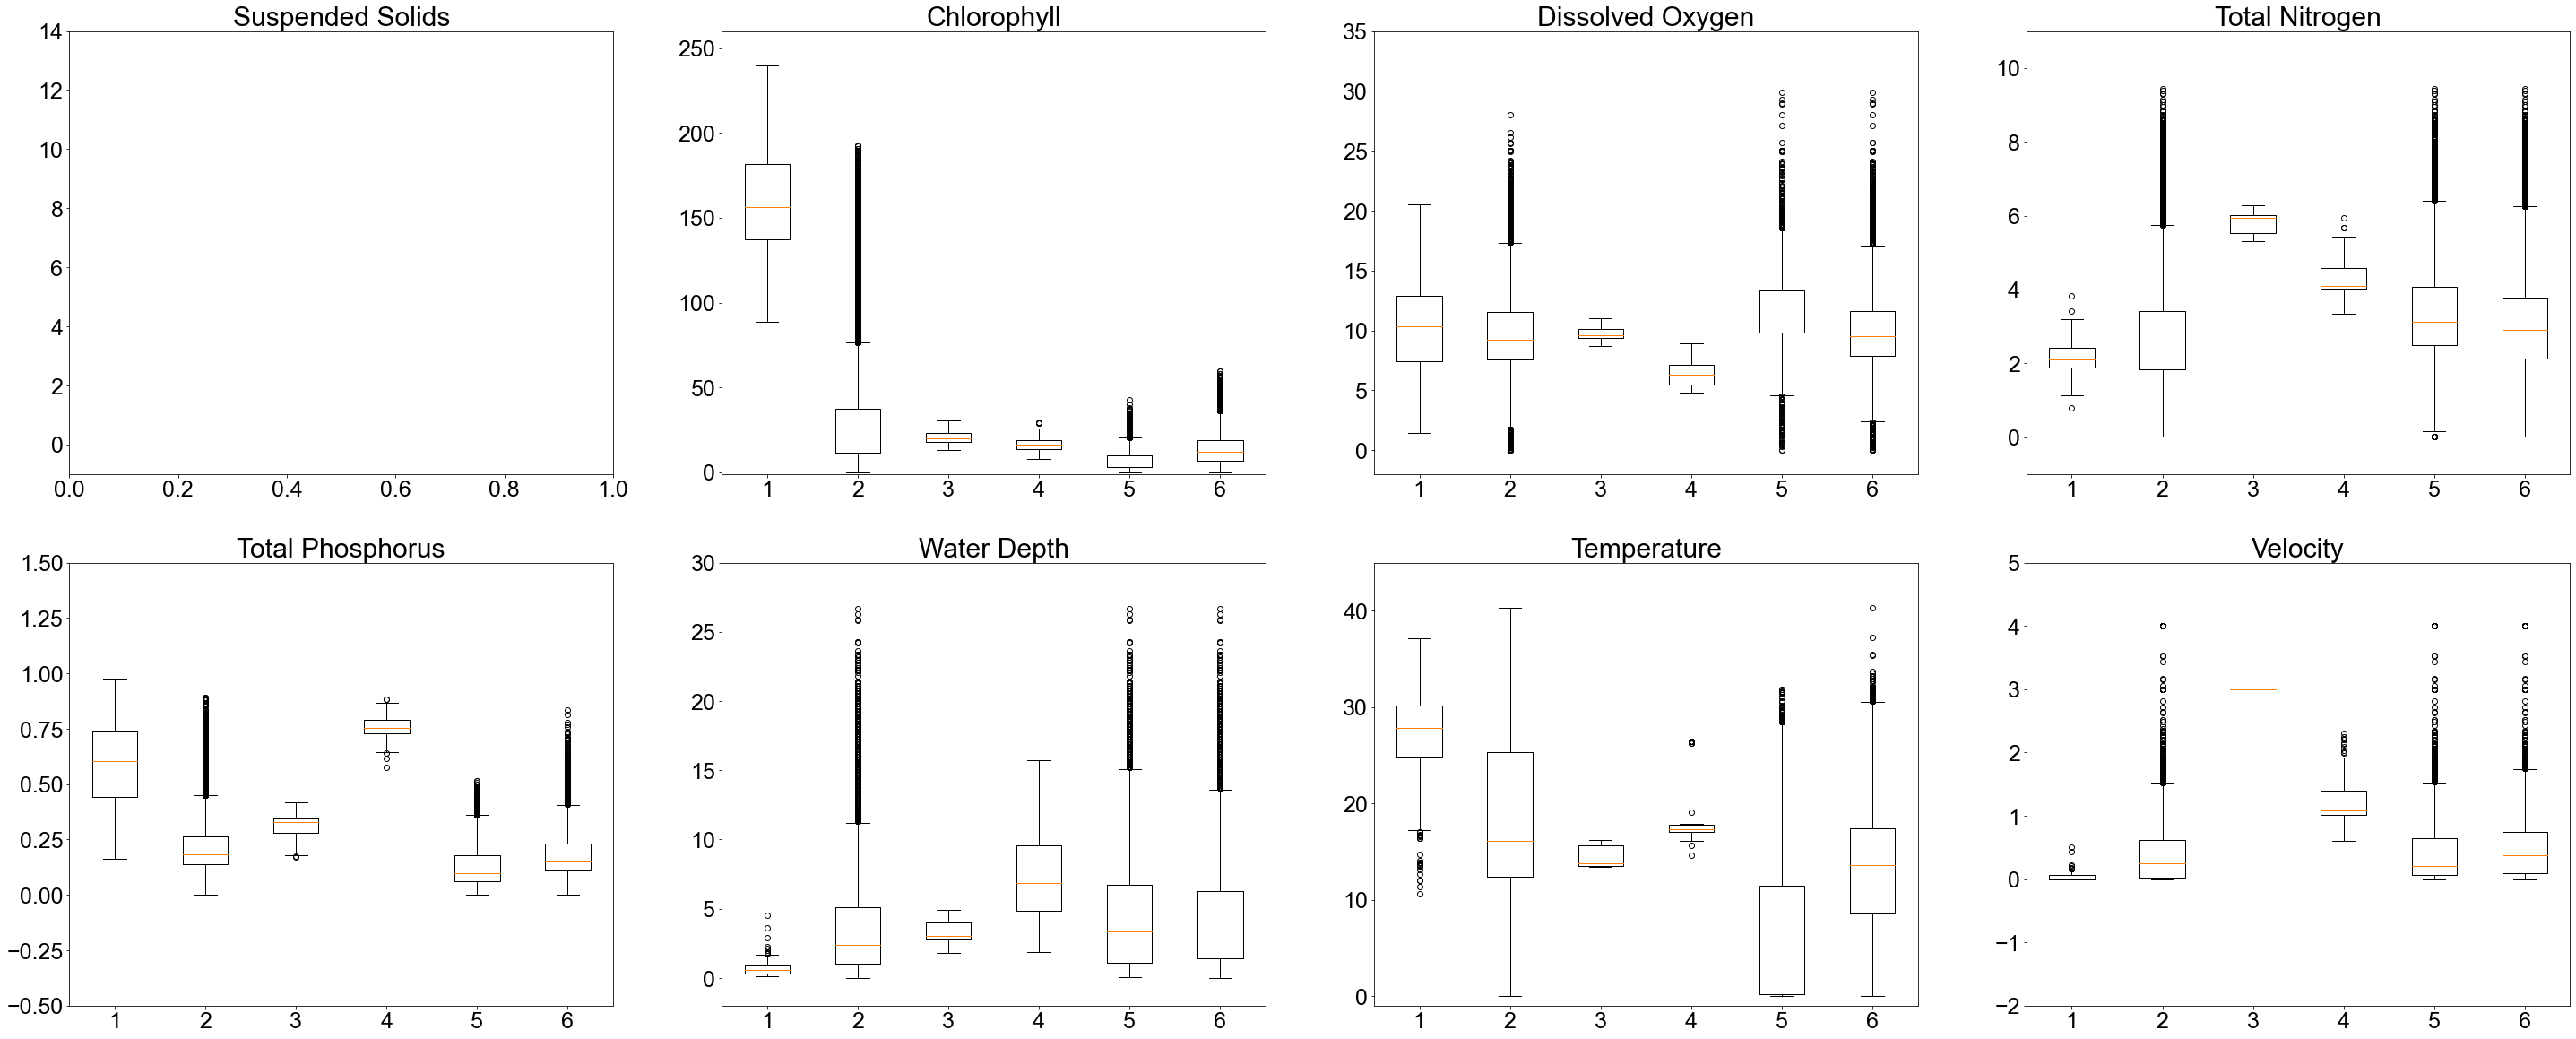

In [9]:
# unscaled boxplots
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, ((ax2, ax3, ax4, ax5), 
      (ax6, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 4, figsize = (50, 20))

# bp1 = ax1.boxplot([state1['TURB'], state2['TURB'],state3['TURB'], state4['TURB'], state5['TURB']],
#                     vert = True,
#                     labels = ['1', '2','3', '4', '5'])
# ax1.set_title('Turbidity')   
# ax1.set_ylim(-1, 14)               

#bp2 = ax2.boxplot([state1['SS'], state2['SS'],state3['SS'], state4['SS'],  state5['SS']],
#                    xvert = True,
#                    labels = ['1', '2','3', '4', '5'])
ax2.set_title('Suspended Solids')   
ax2.set_ylim(-1, 14) 

bp3 = ax3.boxplot([state1['CHLcal_unscaled'], state2['CHLcal_unscaled'],state3['CHLcal_unscaled'], state4['CHLcal_unscaled'],  state5['CHLcal_unscaled'], state6['CHLcal_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5', '6'])
ax3.set_title('Chlorophyll')   
ax3.set_ylim(-1, 260) 

bp4 = ax4.boxplot([state1['DO_unscaled'], state2['DO_unscaled'],state3['DO_unscaled'], state4['DO_unscaled'],  state5['DO_unscaled'], state6['DO_unscaled']],
                    vert = True,
                    labels = ['1', '2','3','4','5','6'])
ax4.set_title('Dissolved Oxygen')   
ax4.set_ylim(-2, 35) 

bp5 = ax5.boxplot([state1['TN_unscaled'], state2['TN_unscaled'],state3['TN_unscaled'], state4['TN_unscaled'], state5['TN_unscaled'], state6['TN_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5','6'])
ax5.set_title('Total Nitrogen')   
ax5.set_ylim(-1, 11)               

bp6 = ax6.boxplot([state1['TP_unscaled'], state2['TP_unscaled'],state3['TP_unscaled'], state4['TP_unscaled'], state5['TP_unscaled'], state6['TP_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5', '6'])
ax6.set_title('Total Phosphorus')   
ax6.set_ylim(-.5, 1.5) 

# bp7 = ax7.boxplot([state1['SECCHI'], state2['SECCHI'],state3['SECCHI'], state4['SECCHI'], state5['SECCHI']],
#                     vert = True,
#                     labels = ['1', '2','3', '4', '5'])
# ax7.set_title('Secchi')   
# ax7.set_ylim(-1, 14) 

bp8 = ax8.boxplot([state1['WDP_unscaled'], state2['WDP_unscaled'],state3['WDP_unscaled'], state4['WDP_unscaled'], state5['WDP_unscaled'], state6['WDP_unscaled']],
                    vert = True,
                    labels = ['1', '2','3','4', '5', '6'])
ax8.set_title('Water Depth')   
ax8.set_ylim(-2, 30) 

bp9 = ax9.boxplot([state1['TEMP_unscaled'], state2['TEMP_unscaled'],state3['TEMP_unscaled'], state4['TEMP_unscaled'], state5['TEMP_unscaled'],state6['TEMP_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5', '6'])
ax9.set_title('Temperature')   
ax9.set_ylim(-1, 45) 

bp10 = ax10.boxplot([state1['VEL_unscaled'], state2['VEL_unscaled'],state3['VEL_unscaled'], state4['VEL_unscaled'], state5['VEL_unscaled'], state6['VEL_unscaled']],
                    vert = True,
                    labels = ['1', '2','3','4', '5', '6'])
ax10.set_title('Velocity')   
ax10.set_ylim(-2, 5) 

plt.savefig('LTRM_boxplots_nurtients_unscaled.png')

### Individual boxplots

In [ ]:
# This prints out one boxplots at a time
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
for variable in continuous_variables :
      fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20))
      bp1 = ax1.boxplot([state1[variable], state2[variable],state3[variable], state4[variable]],
                         vert = True,
                         labels = ['1', '2', '3', '4'])#, '5', '6', '7', '8', '9',
                                    #'10'])#, '14', '15', '16', '17', '18'])
      ax1.set_title(variable)
      ax1.set_ylim(-1, 14)
      file = 'LTRM_' + str(variable) + '_boxplot.png'
      #plt.savefig(file)


## Inverse Robust scaled boxplots

In [ ]:
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))

bp1 = ax1.boxplot([state3['DO_unscaled'], state2['DO_unscaled'],state1['DO_unscaled'], state4['DO_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4'])
ax1.set_title('Dissolved Oxygen (mg/L)')   
ax1.set_ylim(-1, 20)               


plt.savefig('LTRM_DO_unscaled.png')

## Bar graph by stratum and statez

In [69]:
print(stratum_names)

['Backwater area contiguous to the main channel', 'Impounded', 'Isolated', 'Lake Pepin or Swan Lake', 'Main channel', 'Side channel']


In [75]:
crosstab = pd.DataFrame(columns = stratum_names, index = state_names)
print(crosstab)
for stratum in stratum_names:
    for state in state_names:
        crosstab.at[state, stratum] = len(water_df[(water_df['STRATUM'] == stratum) & (water_df[state] == 1)])


        Backwater area contiguous to the main channel Impounded Isolated  \
State 1                                           NaN       NaN      NaN   
State 2                                           NaN       NaN      NaN   
State 3                                           NaN       NaN      NaN   
State 4                                           NaN       NaN      NaN   

        Lake Pepin or Swan Lake Main channel Side channel  
State 1                     NaN          NaN          NaN  
State 2                     NaN          NaN          NaN  
State 3                     NaN          NaN          NaN  
State 4                     NaN          NaN          NaN  
        Backwater area contiguous to the main channel Impounded Isolated  \
State 1                                             1         0        0   
State 2                                         23376      6691      729   
State 3                                            12        13        0   
State 4        

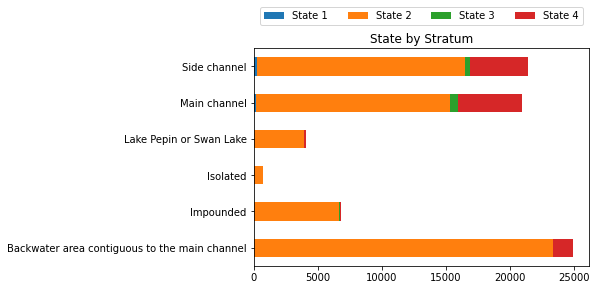

In [113]:
crosstab.plot(kind = 'barh',
    stacked = True,
    title = 'State by Stratum')
plt.legend(loc = "center", bbox_to_anchor = (0.5, 1.15), ncol=4)

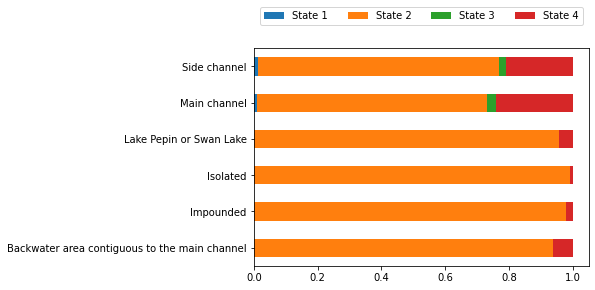

In [110]:
crosstab_norm = crosstab.div( crosstab.sum(axis = 1), axis = 0)
crosstab_norm.plot(kind = 'barh', stacked = True)
plt.legend(loc = "center", bbox_to_anchor = (0.5, 1.15), ncol=4)

<AxesSubplot:title={'center':'State by Stratum'}>

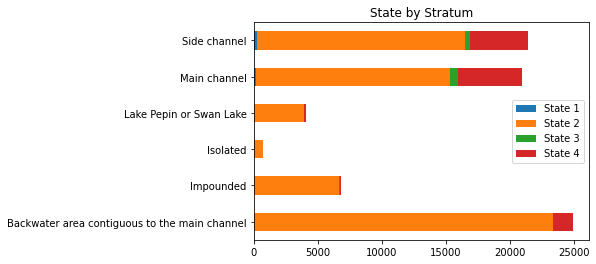

In [106]:
crosstab_2 = pd.DataFrame(columns = state_names, index = stratum_names)
for stratum in stratum_names:
    for state in state_names:
        crosstab_2.at[stratum, state] = len(water_df[(water_df['STRATUM'] == stratum) & (water_df[state] == 1)])

crosstab_2.plot(kind = 'barh',
    stacked = True,
    title = 'State by Stratum')
#plt.legend(loc = "", bbox_to_anchor = (0.5, 1.15), ncol=1)

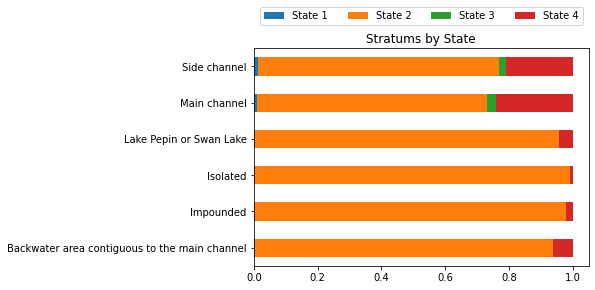

In [109]:
crosstab_norm_2 = crosstab.div( crosstab_2.sum(axis = 1), axis = 0)
crosstab_norm_2.plot(kind = 'barh', stacked = True, title = 'Stratums by State')
plt.legend(loc = "center", bbox_to_anchor = (0.5, 1.15), ncol=4)